In [11]:
import utils
import torch
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
import numpy as np
import pandas as pd
import awkward as ak
from numba import njit
import vector
import numba as nb
import numpy.ma as ma
from torch.utils.data import DataLoader

vector.register_numba()
vector.register_awkward()


hep.style.use(hep.style.ROOT)
torch.set_default_dtype(torch.double)

from Dataset_Parton_Level import Dataset_PartonLevel
from Dataset_Reco_Level import Dataset_RecoLevel
from utils import Test

In [4]:
data_for_dataloader_Parton = Dataset_PartonLevel("../../../dataset_1/v7/")
batch_size = 10000

data_loaded_Parton = DataLoader(data_for_dataloader_Parton, batch_size=batch_size, shuffle=False, drop_last=True)
 
(mask_partons, data_partons, 
 mask_lepton_partons, data_lepton_partons, 
 mask_boost, data_boost, 
 data_intermediate, data_intermediate_cartesian,
 data_ps) = next(iter(data_loaded_Parton))

Create new file for partons
Create new file for lepton_partons
Create new file for boost
Create new file for H_thad_tlep
(569993, 4, 4)
Create new file for H_thad_tlep_cartesian
(569993, 4, 4)


In [5]:
test = utils.Test()

print(data_intermediate.shape)
px_reco, py_reco = test.check_px_py((data_intermediate,))
pz_reco = test.check_pz((data_intermediate,))

print(py_reco)
print(px_reco)
print(pz_reco)


torch.Size([10000, 4, 4])
tensor([ 0.0053, -0.0002, -0.0012,  ..., -0.0008, -0.0077, -0.0032])
tensor([ 0.0062, -0.0001,  0.0125,  ...,  0.0029, -0.0115, -0.0054])
tensor([-0.0140, -0.0010, -0.0168,  ...,  0.0045, -0.0147,  0.0235])


In [7]:
# Mass from data_incomining_particles_boost
mass_incoming = torch.sqrt(data_boost[:,0,0]**2 - data_boost[:,0,1]**2 - data_boost[:,0,2]**2- data_boost[:,0,3]**2)

In [8]:
data_final = torch.sum(data_intermediate_cartesian, axis=1)
print(data_final[0:2])

# Mass from data_intermediate_cartesian
final_mass_cartesian = data_final[:,0]**2 - data_final[:,1]**2 - data_final[:,2]**2 - data_final[:,3]**2
final_mass_cartesian = torch.sqrt(final_mass_cartesian)

tensor([[ 5.8828e+02,  6.2092e-03,  5.3202e-03, -1.3975e-02],
        [ 8.8454e+02, -1.1681e-04, -2.2535e-04, -9.8467e-04]])


In [33]:
higgs = data_for_dataloader_Parton.higgs_boosted
thad = data_for_dataloader_Parton.get_top_hadronic()
tlep = data_for_dataloader_Parton.get_top_leptonic()
gluon_ISR = data_for_dataloader_Parton.gluon_ISR

# Mass from hisst/thad/tlep
final_state = higgs + thad + tlep + gluon_ISR
final_state_mass = ak.to_numpy(final_state.tau)

# Mass from first 2 gluons
initial_state = data_for_dataloader_Parton.boost
initial_state_mass = ak.to_numpy(initial_state.mass)


In [34]:
print(mass_incoming - initial_state_mass[:batch_size])
print(final_mass_cartesian - final_state_mass[:batch_size])

tensor([ 3.5765e-05, -1.1896e-04,  1.3129e-05,  ...,  4.8634e-06,
        -6.1420e-08, -2.8124e-06])
tensor([ 0.0000e+00,  1.1369e-13,  0.0000e+00,  ...,  0.0000e+00,
        -2.2737e-13,  4.5475e-13])


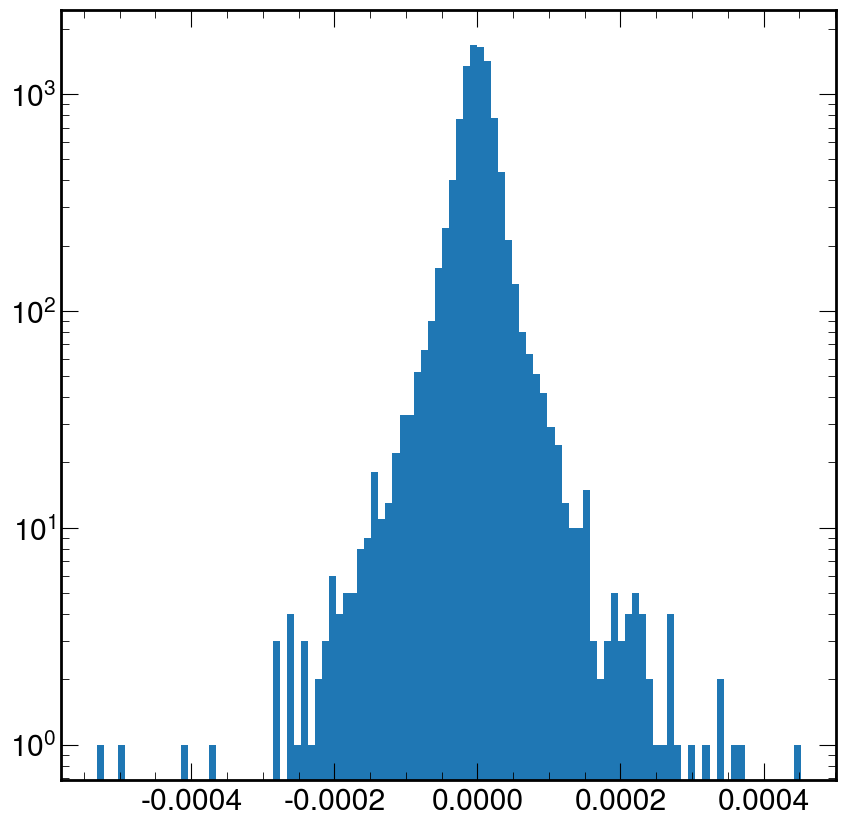

In [18]:
plt.hist(mass_incoming - initial_state_mass[:batch_size], bins=100)
plt.yscale("log")

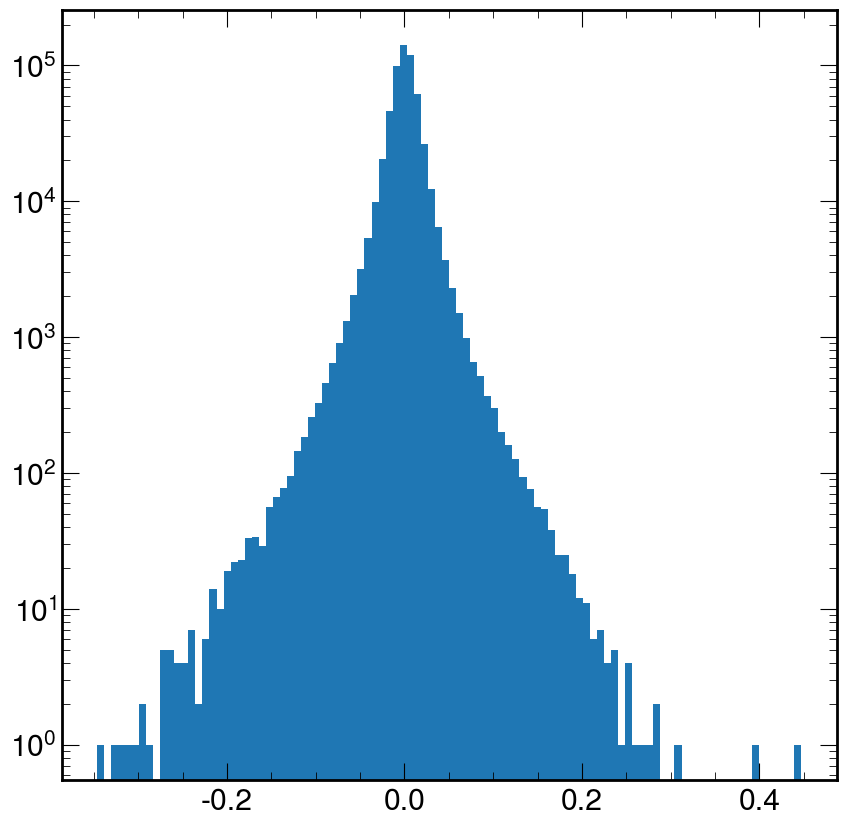

In [24]:
plt.hist(initial_state_mass - final_state_mass, bins=100)
plt.yscale("log")

In [20]:
data_for_dataloader_Reco = Dataset_RecoLevel("../../../dataset_1/only_v6/")
batch_size = 64

data_loaded_Reco = DataLoader(data_for_dataloader_Reco, batch_size=batch_size, shuffle=False, drop_last=True)
 
mask_lepton, data_lepton, mask_jets, data_jets, mask_met, data_met, mask_boost, data_boost = next(iter(data_loaded_Reco))

jets file already exists
lepton_reco file already exists
met file already exists
boost file already exists


In [21]:
test = Test()

px_reco, py_reco = test.check_px_py((data_lepton, data_jets, data_met))
pz_reco = test.check_pz((data_jets, data_lepton, data_met))

print(px_reco)

tensor([ 3.8147e-06, -4.7684e-06,  9.5367e-07,  0.0000e+00,  7.6294e-06,
         1.3351e-05,  0.0000e+00,  0.0000e+00,  2.2888e-05, -1.1444e-05,
        -2.2888e-05, -7.6294e-06,  1.9073e-06, -1.1444e-05,  0.0000e+00,
        -1.1444e-05,  1.9073e-05,  7.6294e-06,  7.6294e-06, -6.6757e-06,
        -3.8147e-06,  1.5259e-05, -2.8610e-05,  3.8147e-06,  1.9073e-06,
        -9.5367e-07, -7.6294e-06, -1.5259e-05, -1.1444e-05,  7.6294e-06,
         1.0490e-05, -3.8147e-06, -1.1444e-05,  9.5367e-07, -1.5259e-05,
        -1.9073e-05,  0.0000e+00,  1.9073e-05, -1.5259e-05, -3.0518e-05,
        -4.6492e-06,  1.1444e-05, -1.7166e-05,  3.0518e-05, -7.6294e-06,
         1.7166e-05, -2.2888e-05, -8.5831e-06,  2.2888e-05, -4.7684e-06,
         7.6294e-06,  7.6294e-06,  1.9073e-06, -1.1176e-05, -1.3828e-05,
         1.1444e-05,  2.2888e-05,  3.5763e-06,  2.4796e-05,  3.0518e-05,
        -1.9073e-06,  0.0000e+00, -3.4332e-05,  1.5259e-05],
       dtype=torch.float32)


# Test concatenation of datasets

In [5]:
from Dataset_Parton_Level import Dataset_PartonLevel
from Dataset_Reco_Level import Dataset_RecoLevel
import torch
from torch.utils.data import Dataset, DataLoader

In [3]:
class DatasetCombined(Dataset):
    def __init__(self, root):
        self.parton_data = Dataset_PartonLevel(root)
        self.reco_data = Dataset_RecoLevel(root)
        
    def __getitem__(self, index):
        return *self.parton_data[index], *self.reco_data[index]

    def __len__(self):
        return len(self.parton_data)

In [13]:
total_dataset = DatasetCombined("../../dataset/v7")
dataloader = DataLoader(total_dataset, batch_size=2048, shuffle=False, drop_last=True)

partons file already exists
lepton_partons file already exists
boost file already exists
H_thad_tlep_ISR file already exists
H_thad_tlep_ISR_cartesian file already exists
jets file already exists
lepton_reco file already exists
met file already exists
boost file already exists


In [14]:
(mask_partons, data_partons, 
mask_lepton_partons, data_lepton_partons, 
mask_boost_parton, data_boost_parton, 
data_intermediate, data_intermediate_cartesian,
data_ps,  mask_lepton, data_lepton, mask_jets,
data_jets,mask_met, data_met,
mask_boost_reco,data_boost_reco) =  next(iter(dataloader))

In [19]:
from memflow.phasespace.utils import get_x1x2_from_uniform

In [21]:
x1, x2 = get_x1x2_from_uniform(data_ps[:, -2:], 470.25, 13000)

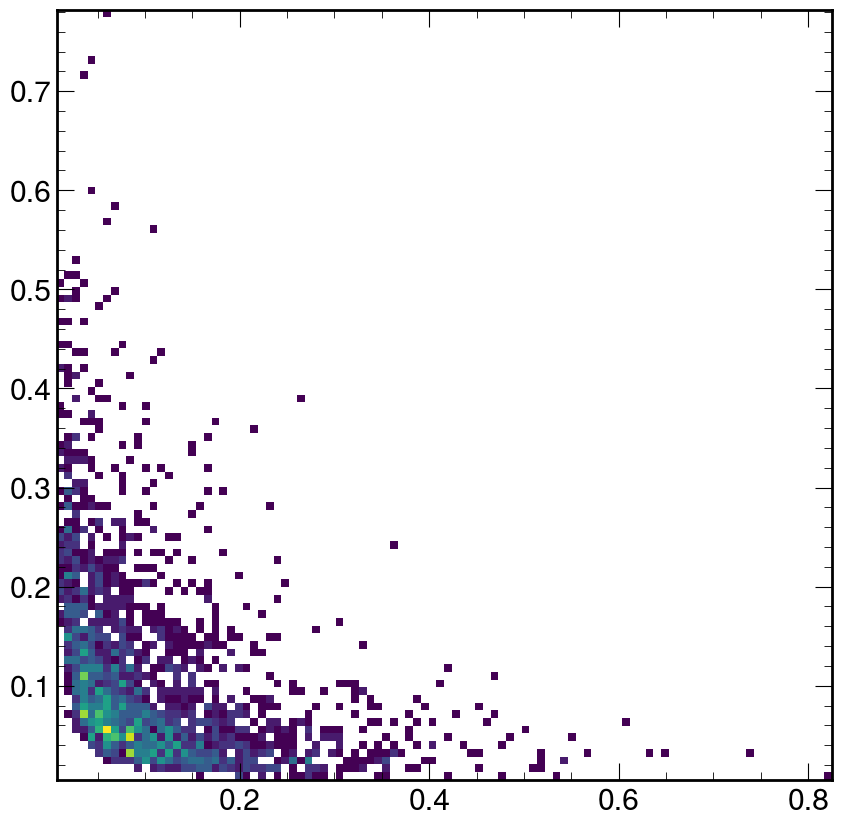

In [23]:
plt.hist2d(x1.numpy(),x2.numpy(), bins=100, cmin=1);

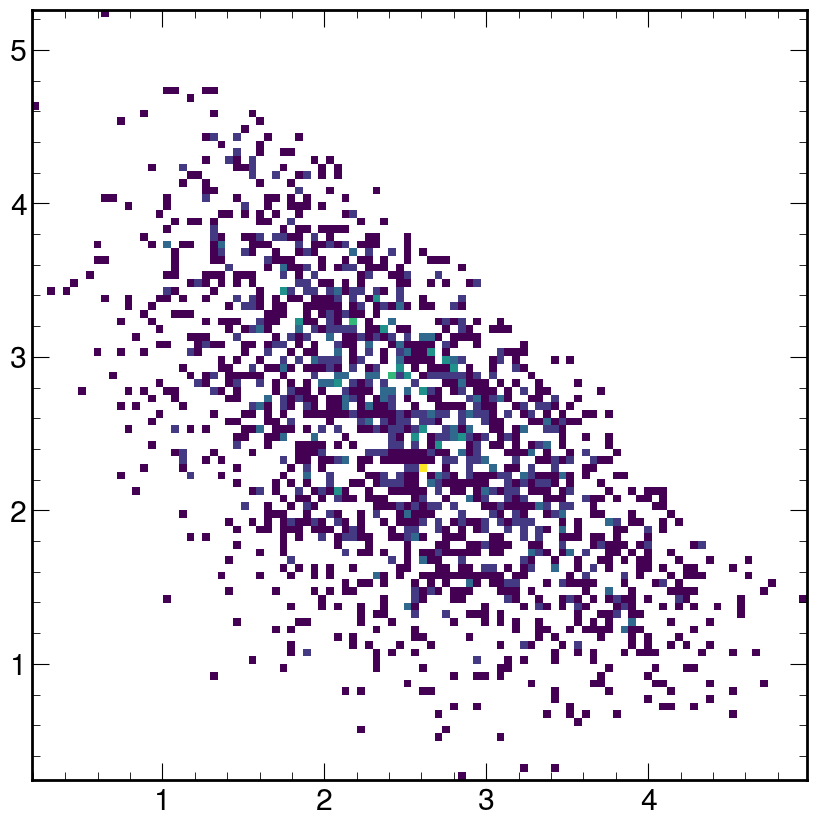

In [25]:
plt.hist2d(-x1.log().numpy(),-x2.log().numpy(), bins=100, cmin=1);

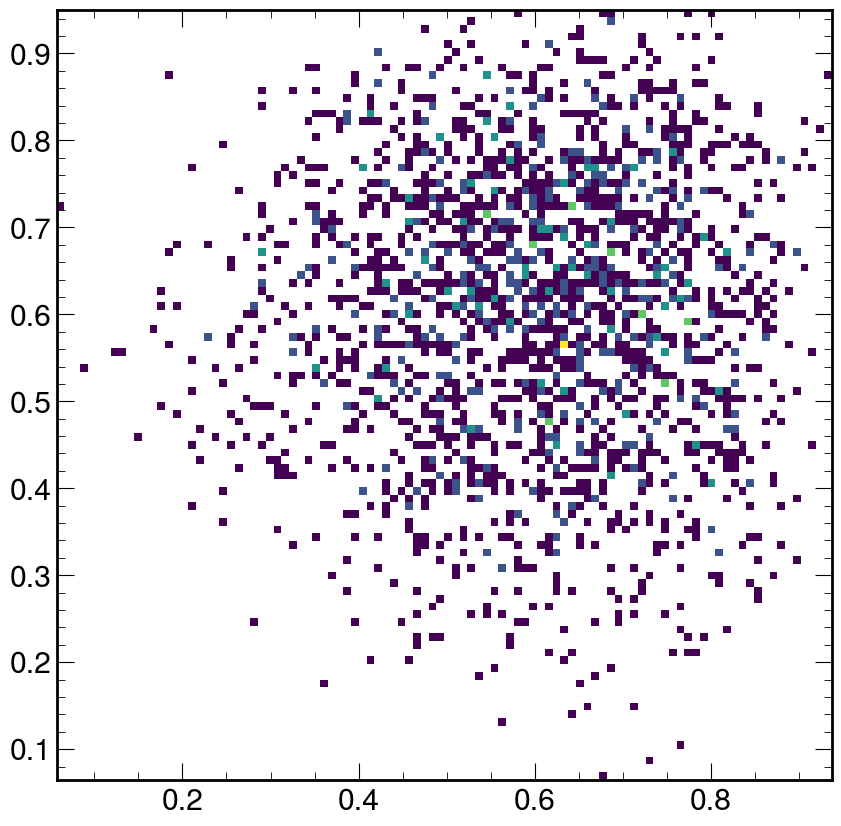

In [24]:
plt.hist2d(data_ps[:, -2].numpy(),data_ps[:, -1].numpy(), bins=100, cmin=1);

# Test rambo

In [33]:
import torch
from memflow.phasespace.phasespace import PhaseSpace
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from  memflow.phasespace.utils import *
torch.set_default_dtype(torch.double)

In [34]:
E_CM = 13000
phasespace = PhaseSpace(E_CM, [21,21], [25,6,-6,21])

In [35]:
points_out, momenta, weight, x1, x2 = phasespace.generate_random_phase_space_points(100000)

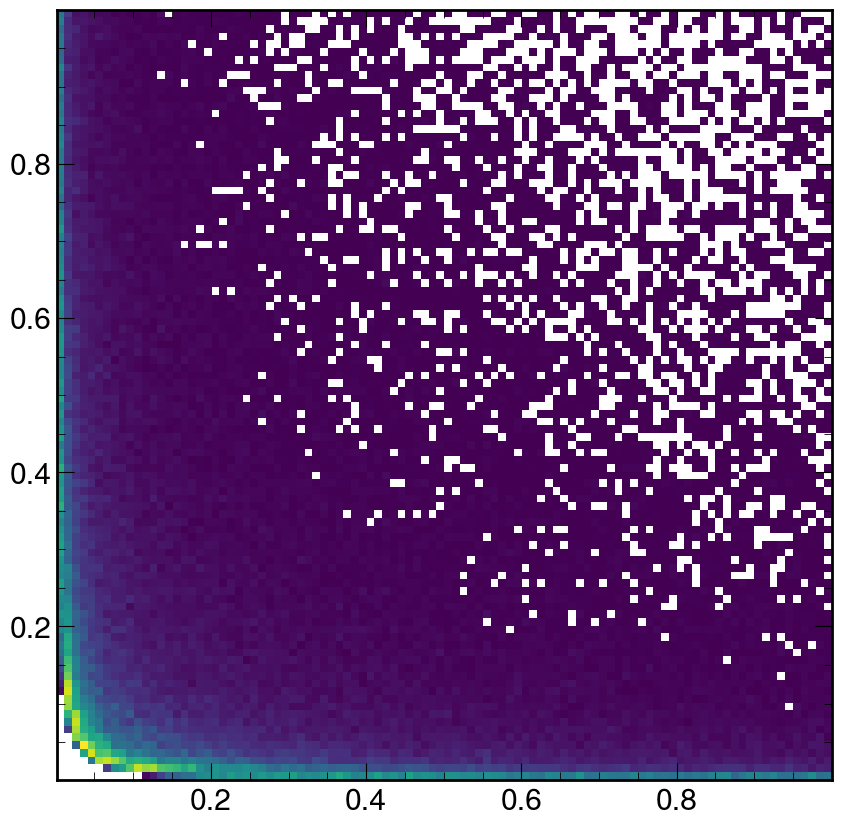

In [36]:
plt.hist2d(x1.numpy(), x2.numpy(), bins=100, cmin=1);

In [37]:
ps_back = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)

In [38]:
ps_back

tensor([[0.1644, 0.6401, 0.0502,  ..., 0.8756, 0.4556, 0.1628],
        [0.8046, 0.4449, 0.9591,  ..., 0.2074, 0.9422, 0.8615],
        [0.4159, 0.5504, 0.9354,  ..., 0.4247, 0.8557, 0.9607],
        ...,
        [0.9075, 0.0765, 0.4836,  ..., 0.5950, 0.0358, 0.7081],
        [0.1482, 0.7106, 0.4352,  ..., 0.8193, 0.9224, 0.7406],
        [0.3147, 0.0117, 0.2141,  ..., 0.2424, 0.2594, 0.9094]])

(array([3.89039e+05, 1.12741e+05, 1.83800e+03, 1.15000e+02, 8.00000e+00,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([-17. , -15.1, -13.2, -11.3,  -9.4,  -7.5,  -5.6,  -3.7,  -1.8,
          0.1,   2. ]),
 <BarContainer object of 10 artists>)

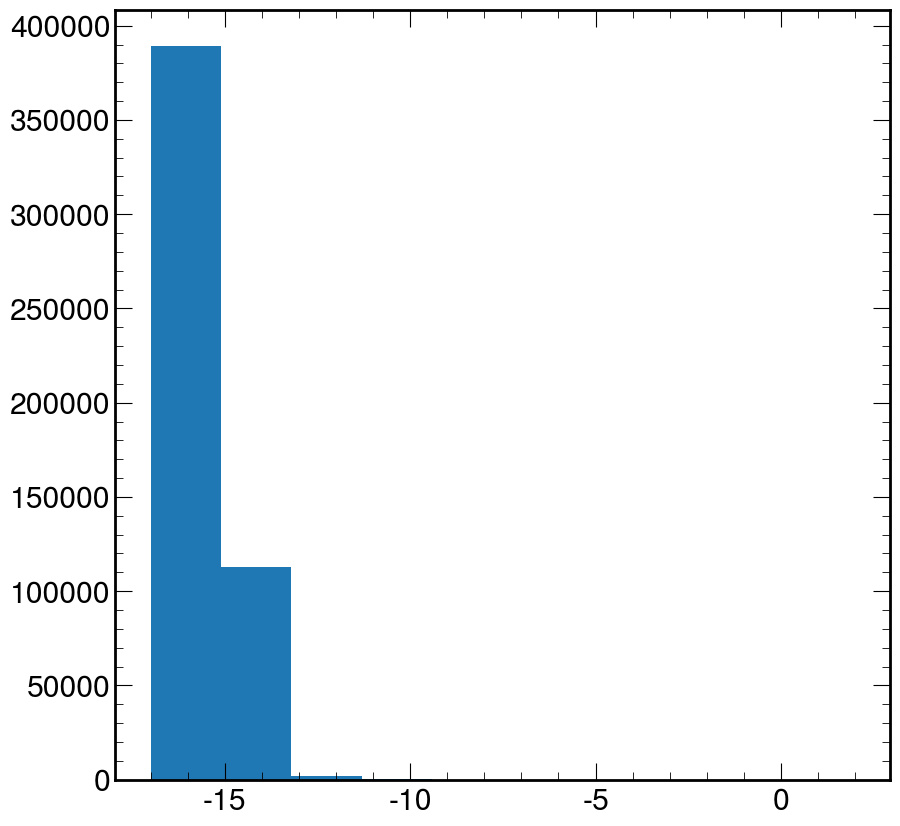

In [39]:
plt.hist(torch.log10(torch.abs(1- ps_back/points_out)).flatten(), bins=10, range=(-17, 2))

In [17]:
momenta_back, weights, x1_back, x2_back = phasespace.get_momenta_from_ps(points_out)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-20. , -19.1, -18.2, -17.3, -16.4, -15.5, -14.6, -13.7, -12.8,
        -11.9, -11. , -10.1,  -9.2,  -8.3,  -7.4,  -6.5,  -5.6,  -4.7,
         -3.8,  -2.9,  -2. ]),
 <BarContainer object of 20 artists>)

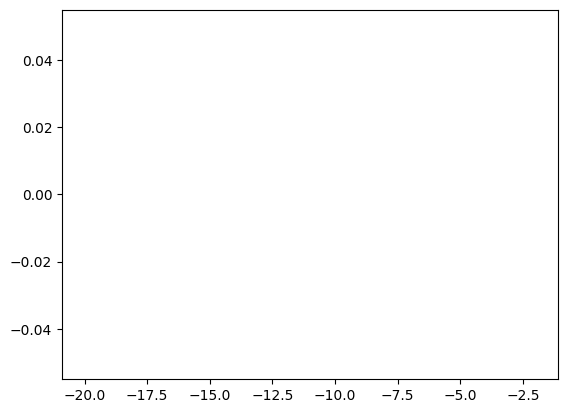

In [18]:
plt.hist(torch.log10(torch.abs(1- momenta_back/momenta)).flatten(), bins=20, range=(-20, -2))

In [23]:
x2 == x2_back

tensor([True, True, True,  ..., True, True, True])